<h2 style="color:purple">Diabetes</h2>
<ol>
        <li>Perform <strong>exploratory data analysis (EDA)</strong> to understand the distribution of features and identify any strong indicators of diabetes.</li>
        <li>
            Visualize the relationship between selected features (like <em>glucose</em>, <em>age</em>, <em>BMI</em>) and the outcome using appropriate <strong>bar charts or boxplots</strong>.
        </li>
        <li>
            Build a <strong>Logistic Regression model</strong> to predict the <code>Outcome</code> (whether a person has diabetes or not).
        </li>
        <li>
            Evaluate the performance of your model using appropriate metrics such as:
            <ul>
                <li>Accuracy</li>
                <li>Confusion Matrix</li>
                <li>Classification Report</li>
            </ul>
        </li>
    </ol>


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/diabetes.csv')
print("Data :\n",df.head())
print("\nShape of data : ",df.shape)
print("Missing Values :\n ",df.isnull().sum())

Data :
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape of data :  (768, 9)
Missing Values :
  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome  

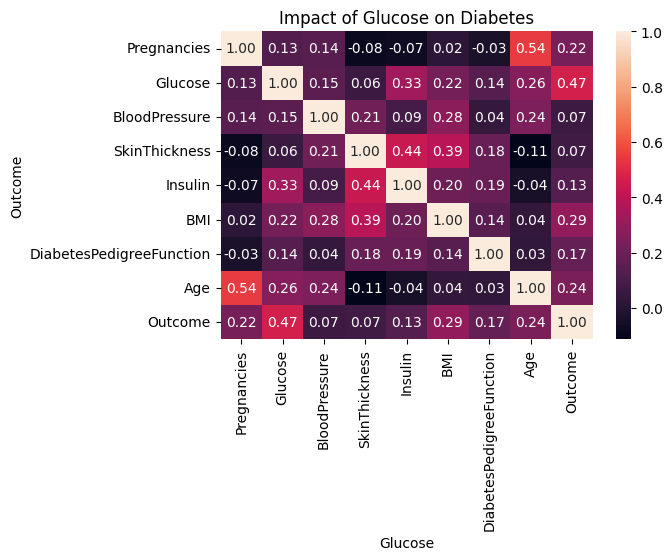

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), fmt=".2f", annot=True)
plt.title('Impact of Glucose on Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

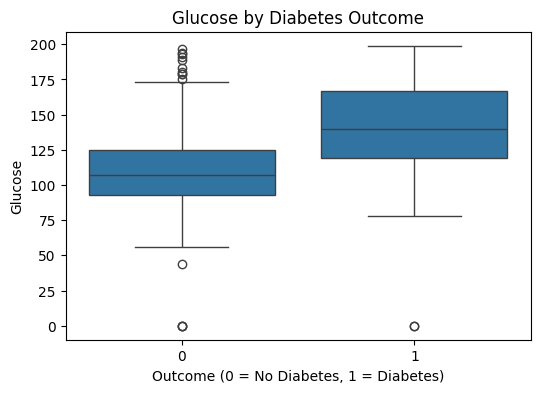

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64




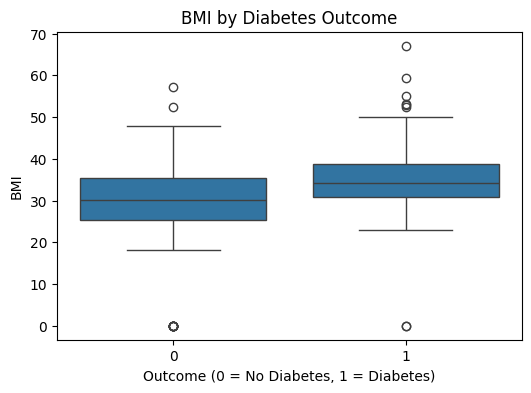

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64




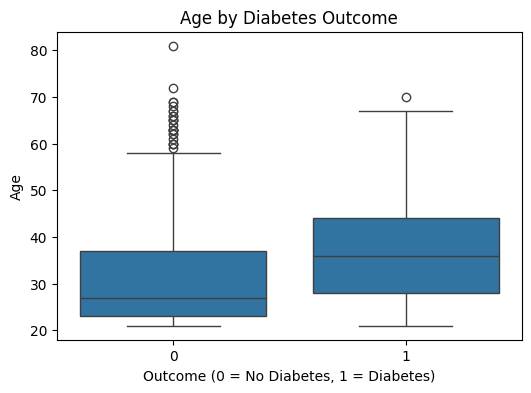

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64




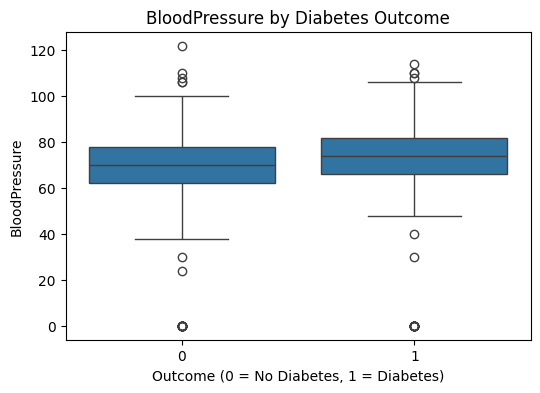

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64




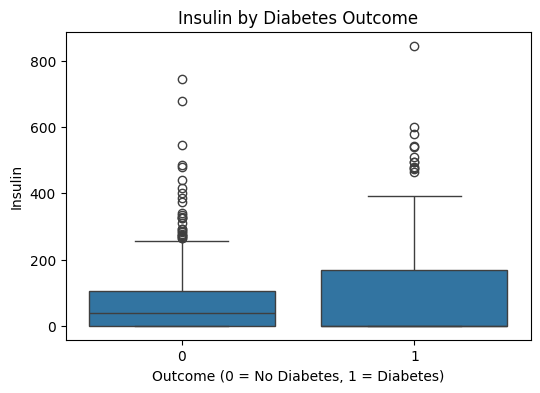

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


In [ ]:
for feature in ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']:
    print("\n")
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Diabetes Outcome')
    plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
    plt.show()
    print(df[feature].describe())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

model.score(X_test,y_test)

y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=['y_predicted'])

# Combine X_test, y_test, and predictions
final_df = pd.concat([X_test.reset_index(drop=True),
                      y_test_df,
                      y_pred_df],
                     axis=1)
final_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,y_predicted
0,6,98,58,33,190,34.0,0.430,43,0,0
1,2,112,75,32,0,35.7,0.148,21,0,0
2,2,108,64,0,0,30.8,0.158,21,0,0
3,8,107,80,0,0,24.6,0.856,34,0,0
4,7,136,90,0,0,29.9,0.210,50,0,0


In [ ]:
correct_count = (final_df['Outcome'] == final_df['y_predicted']).sum()
incorrect_count = (final_df['Outcome'] != final_df['y_predicted']).sum()

print("Correct predictions:", correct_count)
print("Incorrect predictions:", incorrect_count)

Correct predictions: 115
Incorrect predictions: 39


In [ ]:
# 1. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, "\n")

# 3. Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7468

Confusion Matrix:
[[78 21]
 [18 37]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

